In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
import PIL
from torchvision import models
import numpy as np
import torchvision.transforms as T
import cv2

In [2]:
def binary(rgb):
    for i in range(rgb.shape[0]):
        for j in range(rgb.shape[1]):
            if (rgb[i,j,:].max()>0):
                rgb[i,j,:]=[255,255,255]
            else: 
                rgb[i,j,:]=[0,0,0,]
    bimg = rgb[:,:,0]          
    return bimg

In [3]:
def decode(img,matrix):
    out = np.zeros(img.shape)
    zero = np.array([0,0,0]).astype('uint8')
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if ((img[i,j,:][0]==matrix[0]) and (img[i,j,:][1]==matrix[1]) and (img[i,j,:][2]==matrix[2])):
                out[i,j,:]=img[i,j,:]
            else: 
                out[i,j,:]=zero
    return out

In [4]:
def union(img1, img2):
    img = img1 + img2
    out = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if (img[i,j] > 0):
                out[i,j] = 1
            else:
                out[i,j] =0
    return out

In [5]:
def inter(img1, img2):
    out = np.array(img1 * img2)
    return out

In [6]:
rgb = np.load('rgb.npy')
mask = plt.imread('YANSE@TCD.IE_mask.png')

In [7]:
mask = np.array(mask*255).astype('uint8')

The original images


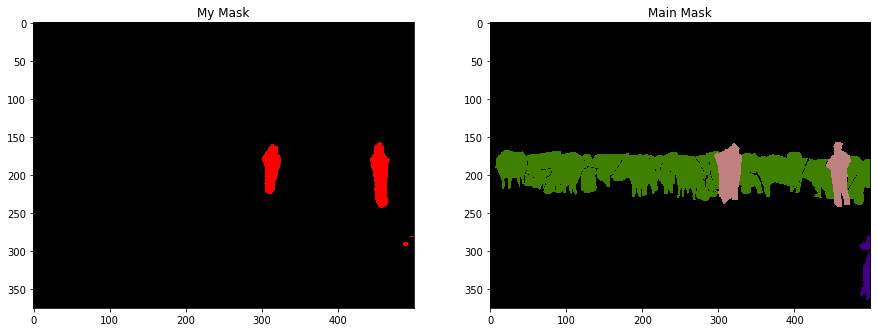

In [8]:
fig = plt.figure(figsize = (15,15))
plt.subplot(121)
plt.imshow(rgb)
plt.title('My Mask')
plt.subplot(122)
plt.imshow(mask)
plt.title('Main Mask')
print('The original images')

In [9]:
# array means the color of the items in my class
array = np.array([192,128,128]).astype('uint8')
mask = decode(mask,array)

In [10]:
rgb = binary(rgb)
mask = binary(mask)

In [11]:
rgb = np.array(rgb).astype('int')
mask = np.array(mask).astype('int')

Masks after decoding and binary processing


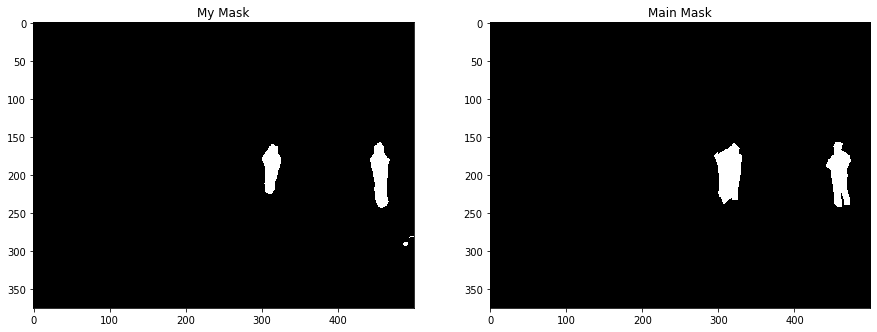

In [12]:
fig = plt.figure(figsize = (15,15))
plt.subplot(121)
plt.imshow(rgb, cmap = 'gray')
plt.title('My Mask')
plt.subplot(122)
plt.imshow(mask, cmap = 'gray')
plt.title('Main Mask')
print('Masks after decoding and binary processing')

In [13]:
rgb = (rgb/255).astype('int')
mask = (mask/255).astype('int')

In [14]:
diff = np.abs(rgb - mask)
inte = 1-diff

In [15]:
true = np.sum(inte == 1)
total = rgb.shape[0]*rgb.shape[1]
IoU_all = true/total
print('The IoU of the whole image is ', IoU_all)

The IoU of the whole image is  0.9913333333333333


In [16]:
union_img = union(rgb, mask)
inter_img = inter(rgb, mask)

Union & Inter for Main Mask and My Mask


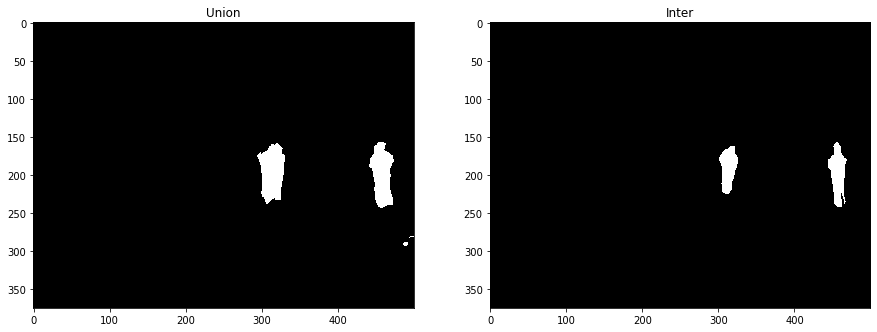

In [17]:
fig = plt.figure(figsize = (15,15))
plt.subplot(121)
plt.imshow(union_img, cmap='gray')
plt.title('Union')
plt.subplot(122)
plt.imshow(inter_img, cmap = 'gray')
plt.title('Inter')
print('Union & Inter for Main Mask and My Mask')

In [18]:
union_value = np.sum(union_img == 1)
inter_value = np.sum(inter_img == 1)

In [19]:
IoU = inter_value/union_value
print('The IoU of my class is', IoU)

The IoU of my class is 0.5852475752935171
